# 220968280 - Anirudh Swaminathan - DSE A2

## exercise2-week7 text analysis using amazon_baby.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/s_ani/Documents/da/amazon_baby.csv")
df.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


### 1. Check the number of the reviews received for each product.

In [3]:
df.name.value_counts()

name
Vulli Sophie the Giraffe Teether                                                                                                                                                                                                                                                                                                                       785
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L                                                                                                                                                                                                                                                                                                    562
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision                                                                                                                                                                                                                                     

### 2. Check the products that have more than 15 reviews.

In [4]:
df.name.value_counts().loc[lambda x : x > 15]

name
Vulli Sophie the Giraffe Teether                                                  785
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L                               562
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision          561
Baby Einstein Take Along Tunes                                                    547
Cloud b Twilight Constellation Night Light, Turtle                                520
                                                                                 ... 
Dabbawalla Lunch Bag, Cute as a Bug                                                16
JJ Cole Arctic Bundleme, Cocoa/Lagoon, Infant                                      16
Ju-Ju-Be Fuel Cell Insulated Bag, Black/Silver                                     16
The Shower Hug for Pregnant and Nursing Moms., X/S, White with Petal Pink Trim     16
Kissaluvs Diaper Lotion Potion 4 oz, Spray                                         16
Name: count, Length: 2339, dtype: int64

### 3. Find any missing review are present or not, If present remove those data

In [5]:
df.isnull().sum()
df = df[df.review.notna()]

### 4. Clean the data and replace the contractions with their expansions.

In [6]:
contractions = {
"a'ight":"alright",
"ain't":"are not",
"amn't":"am not",
"aren't":"are not",
"can't":"cannot",
"'cause": "because",
"could've":"could have",
"couldn't":"could not",
"couldn't've":"could not have",
"daren't":"dare not",
"daresn't":"dare not",
"dasn't":"dare not",
"didn't":"did not",
"doesn't":"does not",
"don't":"do not",
"everybody's":"everybody is",
"everyone's":"everyone is",
"giv'n":"given",
"gonna":"going to",
"gon't":"go not", 
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't":"has not",
"haven't":"have not",
"he'd":"he had", 
"he'll":"he will",
"he's":"he is",
"here's":"here is",
"how'd":"how did",
"how'll":"how will",
"how're":"how are",
"how's":"how is",
"I'd":"I had",
"I'd've":"I would have",
"I'd'nt":"I would not",
"I'd'nt've":"I would not have",
"I'll":"I will",
"I'm":"I am",
"I've":"I have",
"isn't":"is not",
"it'd":"it would",
"it'll":"it will",
"it's":"it is",
"let's":"let us",
"ma'am":"madam",
"mayn't":"may not",
"may've":"may have",
"mightn't":"might not",
"might've":"might have",
"mustn't":"must not",
"mustn't've":"must not have",
"must've":"must have",
"needn't":"need not",
"needn't've":"need not have",
"o'clock":"of the clock",
"oughtn't":"ought not",
"oughtn't've":"ought not have",
"shan't":"shall not",
"she'd":"she would",
"she'll":"she will",
"she's":"she is",
"should've":"should have",
"shouldn't":"should not",
"shouldn't've":"should not have",
"somebody's":"somebody is",
"someone's":"someone is",
"something's":"something is",
"so're":"so are",
"so’s":"so is",
"so’ve":"so have",
"that'll":"that will",
"that're":"that are",
"that's":"that is",
"that'd":"that would",
"there'd":"there would",
"there'll":"there will",
"there're":"there are",
"there's":"there is",
"these're":"these are",
"these've":"these have",
"they'd":"they would",
"they'll":"they will",
"they're":"they are",
"they've":"they have",
"this's":"this is",
"those're":"those are",
"those've":"those have",
"to've":"to have",
"wasn't":"was not",
"we'd":"we would",
"we'd've":"we would have",
"we'll":"we will",
"we're":"we are",
"we've":"we have",
"weren't":"were not",
"what'd":"what did",
"what'll":"what will",
"what're":"what are",
"what's":"what is",
"what've":"what have",
"when's":"when is",
"where'd":"where did",
"where'll":"where will",
"where're":"where are",
"where's":"where is",
"where've":"where have",
"which'd":"which would",
"which'll":"which will",
"which're":"which are",
"which's":"which is",
"which've":"which have",
"who'd":"who would",
"who'd've":"who would have",
"who'll":"who will",
"who're":"who are",
"who's":"who is",
"who've":"who have",
"why'd":"why did",
"why're":"why are",
"why's":"why is",
"won't":"will not",
"would've":"would have",
"wouldn't":"would not",
"wouldn't've":"would not have",
"y'at":"you at",
"yes’m":"yes madam",
"you'd":"you would",
"you'll":"you will",
"you're":"you are",
"you've":"you have"}

In [7]:
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x
    
df['review'] = df['review'].apply(lambda x:cont_to_exp(x))

### 5. Add the Polarity, length of the review, the word count and average word length of each review.

In [8]:
from textblob import TextBlob

df['polarity'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)


df['review_len'] = df['review'].apply(lambda x:len(x))

df['word_count'] = df['review'].apply(lambda x: len(x.split()))


def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
        
    return word_len/len(words) 


df['avg_word_len'] = df['review'].apply(lambda x: get_avg_word_len(x))

### 6. Visualize the distribution of the word count, review length, and polarity.

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

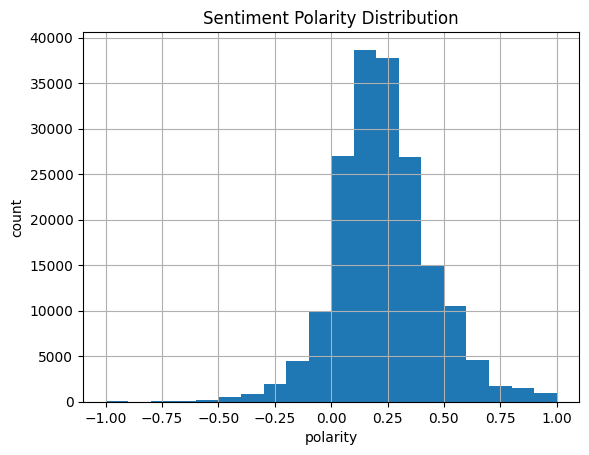

In [9]:
df['polarity'].hist(bins=20)
plt.xlabel('polarity')
plt.ylabel('count')
plt.title('Sentiment Polarity Distribution')

Text(0.5, 1.0, 'Review Text Length Distribution')

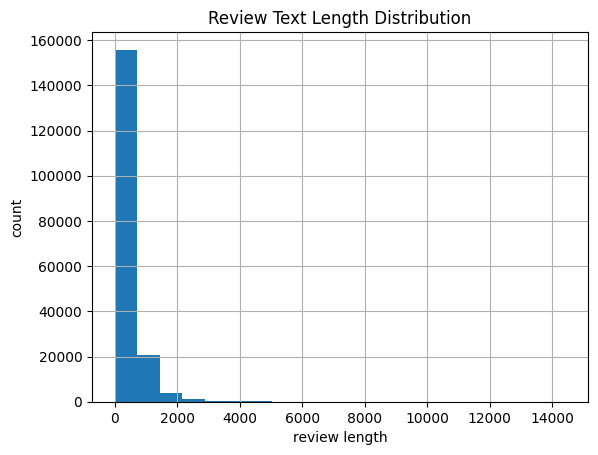

In [10]:
df['review_len'].hist(bins=20)
plt.xlabel('review length')
plt.ylabel('count')
plt.title('Review Text Length Distribution')

Text(0.5, 1.0, 'Word Count Distribution')

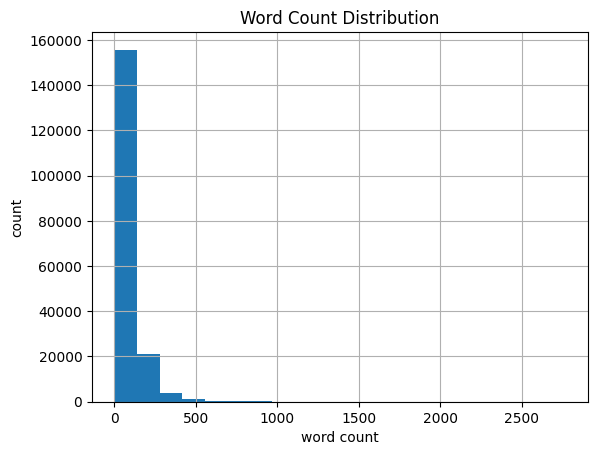

In [11]:
df['word_count'].hist(bins=20)
plt.xlabel('word count')
plt.ylabel('count')
plt.title('Word Count Distribution')

### 7. Visualize polarity considering the rating.

C:\Users\s_ani\AppData\Local\Temp\ipykernel_55764\4018436321.py:1: FutureWarning: The provided callable <function mean at 0x00000131AE0D6FC0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(by='rating').polarity.agg([np.mean]).plot()


Text(0.5, 1.0, 'Polarity considering Rating')

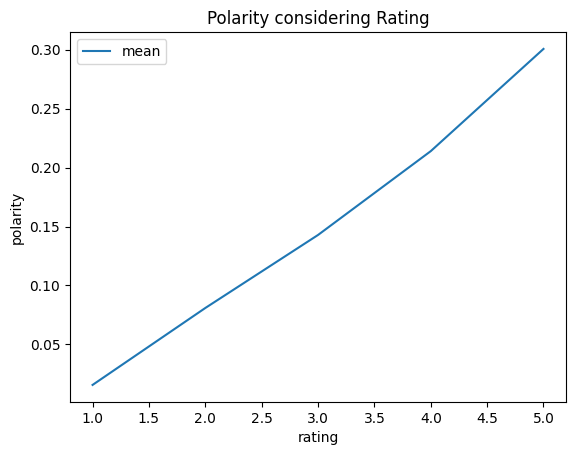

In [12]:
df.groupby(by='rating').polarity.agg([np.mean]).plot()
plt.xlabel('rating')
plt.ylabel('polarity')
plt.title('Polarity considering Rating')

### 8. Visualize the count of the reviews of each rating available in the dataset.

Text(0.5, 1.0, 'count of the reviews of each rating')

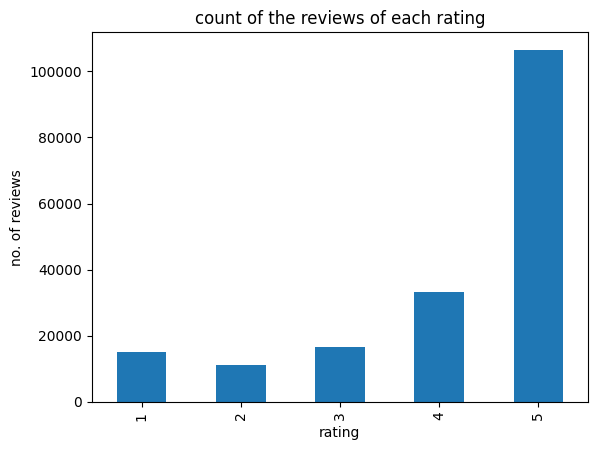

In [13]:
df.groupby(by='rating').review.count().plot.bar()
plt.xlabel('rating')
plt.ylabel('no. of reviews')
plt.title('count of the reviews of each rating')

### 9. List the Top 20 products based on the polarity

In [14]:
df.sort_values(by='polarity', ascending=False)[0:20]

,name,review,rating,polarity,review_len,word_count,avg_word_len
139861,Kids Line Bunny Meadow Hamper,Perfect to go with the bedding,5,1.0,30,6,4.166667
52620,Sugar Booger &quot;Vroom&quot; Feeding Collect...,Perfect set of silverware for my child to take...,5,1.0,88,15,4.933333
148073,NUK OrthoStar Design Pacifiers Boys Color (2pk),My son loves these pacifiers. Slim nipple is ...,5,1.0,180,35,4.085714
8447,Malawi - 6 Piece Bedding Set.,I bought everything Malawi; from the bedding t...,5,1.0,111,19,4.894737
152600,"Cotton Tale Designs 8 Piece Bedding Set, Lizzie",Looks great!!,4,1.0,13,2,6.000000
39902,Euro Clip Seat Belt Adjuster - 2 Pack,I looked everywhere for years to find these se...,5,1.0,163,30,4.466667
33724,Lamaze Play &amp; Grow Freddie the Firefly Tak...,WONDERFUL TOY ... BABES LOVETODDLERS TOO,5,1.0,40,6,5.833333
164675,"KF Baby Clip-On Mini Stroller Fan, Yellow","Great product to attach to the stroller, bassi...",5,1.0,144,26,4.538462
176389,Medela 8 Oz Breastmilk Bottle Set WITH Six Med...,Bottles are perfect for nursing and milk stora...,5,1.0,193,39,3.948718
145672,Nuk Replacement Spouts - 4 Pack Clear,This was the best way for my baby to start dri...,5,1.0,107,22,3.909091


### 10. Visualize to check whether the review length changes with rating.

C:\Users\s_ani\AppData\Local\Temp\ipykernel_55764\1852984568.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='rating', y='review_len', data=df, ci=None)


Text(0.5, 1.0, 'Review Length vs Rating')

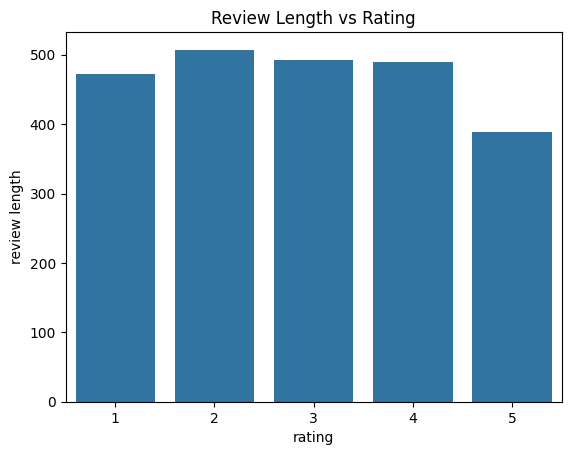

In [15]:
sns.barplot(x='rating', y='review_len', data=df, ci=None)
plt.xlabel('rating')
plt.ylabel('review length')
plt.title('Review Length vs Rating')

### 11. Visualize the distribution of Top 25 Unigram, Bigram and Trigram.

In [16]:
def get_top_n_words(x, n=25):
    vec = CountVectorizer(stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

Text(0.5, 1.0, 'Unigrams Count')

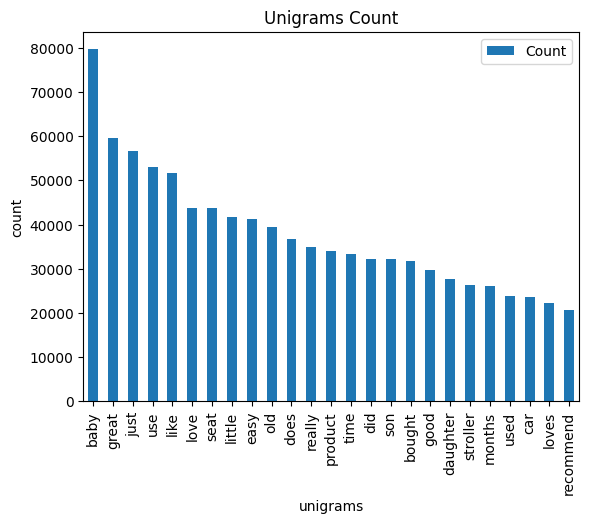

In [19]:
common_words = get_top_n_words(df['review'], 25)
common_words
df1 = pd.DataFrame(common_words, columns = ['Unigram Text' , 'Count'])

df1.set_index('Unigram Text', drop=True, inplace=True)
df1.plot.bar()
plt.xlabel('unigrams')
plt.ylabel('count')
plt.title('Unigrams Count')

In [20]:
def get_top_n_bigram(x, n=25):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

Text(0.5, 1.0, 'Bigrams Count')

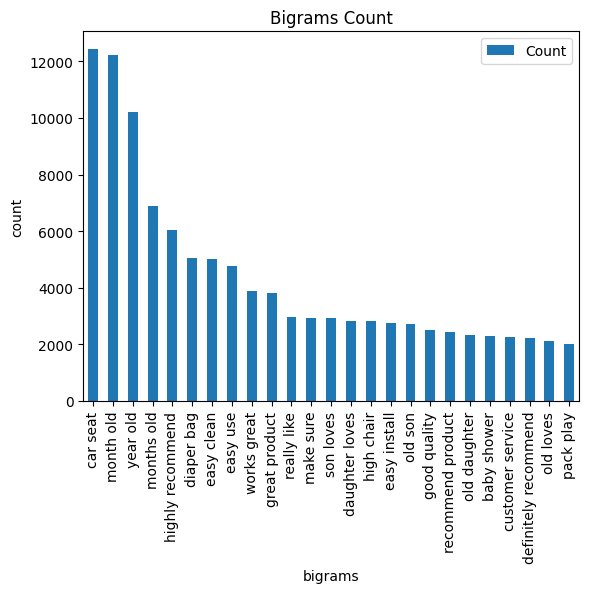

In [21]:
common_words = get_top_n_bigram(df['review'], 25)
common_words
df1 = pd.DataFrame(common_words, columns = ['Bigram Text' , 'Count'])

df1.set_index('Bigram Text', drop=True, inplace=True)
df1.plot.bar()
plt.xlabel('bigrams')
plt.ylabel('count')
plt.title('Bigrams Count')

In [22]:
def get_top_n_trigram(x, n=25):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words="english").fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

Text(0.5, 1.0, 'Trigrams Count')

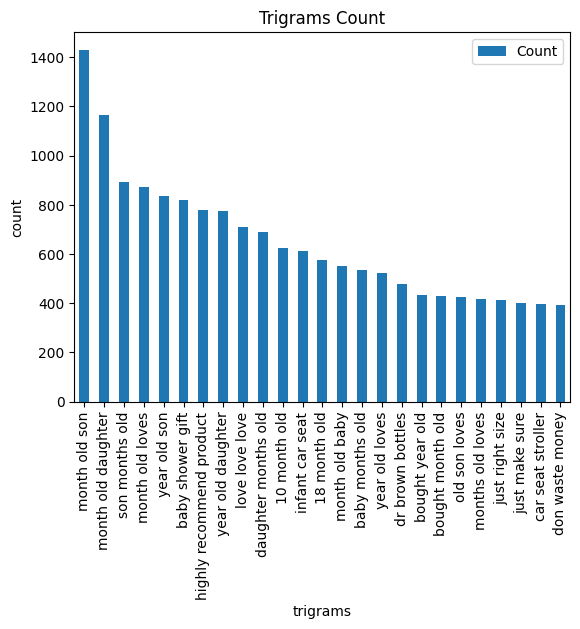

In [23]:
common_words = get_top_n_trigram(df['review'], 25)
common_words
df1 = pd.DataFrame(common_words, columns = ['Trigram Text' , 'Count'])

df1.set_index('Trigram Text', drop=True, inplace=True)
df1.plot.bar()
plt.xlabel('trigrams')
plt.ylabel('count')
plt.title('Trigrams Count')